In [10]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

Stock name: LIN
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


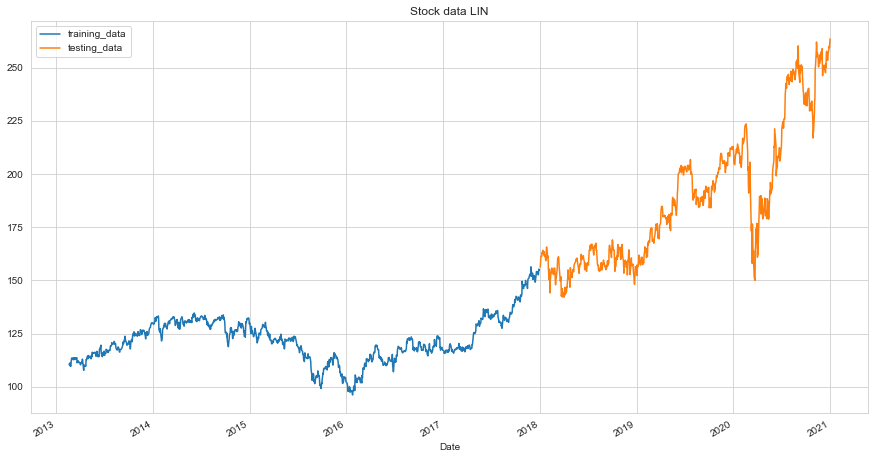

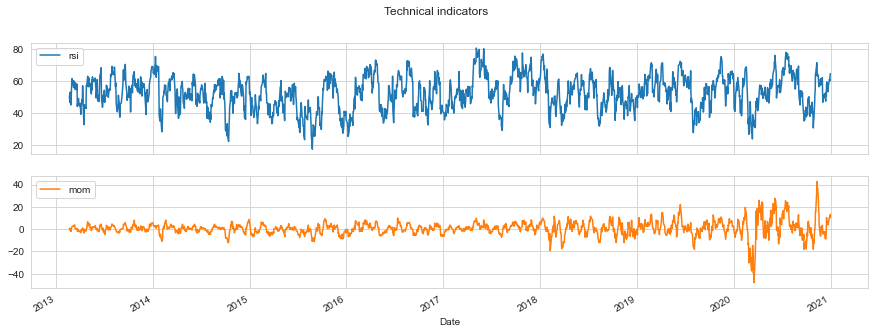

In [11]:
stock_name = 'lin'.upper()
industry = 'Basic Materials'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [12]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1156.23, duration: 0:00:00.228050
episode: 2/2000, episode end value: 1127.89, duration: 0:00:00.223059
episode: 3/2000, episode end value: 1132.99, duration: 0:00:00.235052
episode: 4/2000, episode end value: 1124.71, duration: 0:00:00.240064
episode: 5/2000, episode end value: 1146.77, duration: 0:00:00.239056
episode: 6/2000, episode end value: 1131.51, duration: 0:00:00.224050
episode: 7/2000, episode end value: 1155.97, duration: 0:00:00.219041
episode: 8/2000, episode end value: 1133.83, duration: 0:00:00.274063
episode: 9/2000, episode end value: 1135.50, duration: 0:00:00.233060
episode: 10/2000, episode end value: 1126.85, duration: 0:00:00.209045
episode: 11/2000, episode end value: 1124.62, duration: 0:00:00.241040
episode: 12/2000, episode end value: 1130.49, duration: 0:00:00.226042
episode: 13/2000, episode end value: 1133.57, duration: 0:00:00.221067
episode: 14/2000, episode end value: 1134.42, duration: 0:00:00.255052
episode: 15/200

episode: 118/2000, episode end value: 1168.83, duration: 0:00:00.216055
episode: 119/2000, episode end value: 1171.63, duration: 0:00:00.217055
episode: 120/2000, episode end value: 1152.20, duration: 0:00:00.212029
episode: 121/2000, episode end value: 1180.33, duration: 0:00:00.212063
episode: 122/2000, episode end value: 1144.80, duration: 0:00:00.201044
episode: 123/2000, episode end value: 1185.51, duration: 0:00:00.196035
episode: 124/2000, episode end value: 1160.34, duration: 0:00:00.210067
episode: 125/2000, episode end value: 1144.05, duration: 0:00:00.213042
episode: 126/2000, episode end value: 1160.95, duration: 0:00:00.224035
episode: 127/2000, episode end value: 1176.43, duration: 0:00:00.230048
episode: 128/2000, episode end value: 1164.47, duration: 0:00:00.206057
episode: 129/2000, episode end value: 1161.93, duration: 0:00:00.208046
episode: 130/2000, episode end value: 1151.77, duration: 0:00:00.200044
episode: 131/2000, episode end value: 1151.50, duration: 0:00:00

episode: 232/2000, episode end value: 1165.93, duration: 0:00:00.222052
episode: 233/2000, episode end value: 1161.65, duration: 0:00:00.227049
episode: 234/2000, episode end value: 1159.28, duration: 0:00:00.257069
episode: 235/2000, episode end value: 1162.84, duration: 0:00:00.249059
episode: 236/2000, episode end value: 1178.12, duration: 0:00:00.271067
episode: 237/2000, episode end value: 1143.85, duration: 0:00:00.238038
episode: 238/2000, episode end value: 1168.53, duration: 0:00:00.211049
episode: 239/2000, episode end value: 1159.80, duration: 0:00:00.243071
episode: 240/2000, episode end value: 1162.31, duration: 0:00:00.239036
episode: 241/2000, episode end value: 1180.72, duration: 0:00:00.254057
episode: 242/2000, episode end value: 1175.82, duration: 0:00:00.237053
episode: 243/2000, episode end value: 1173.87, duration: 0:00:00.239053
episode: 244/2000, episode end value: 1155.03, duration: 0:00:00.240052
episode: 245/2000, episode end value: 1150.77, duration: 0:00:00

episode: 346/2000, episode end value: 1168.50, duration: 0:00:00.299067
episode: 347/2000, episode end value: 1147.80, duration: 0:00:00.245054
episode: 348/2000, episode end value: 1167.84, duration: 0:00:00.271061
episode: 349/2000, episode end value: 1173.28, duration: 0:00:00.283066
episode: 350/2000, episode end value: 1139.86, duration: 0:00:00.235051
episode: 351/2000, episode end value: 1171.18, duration: 0:00:00.240051
episode: 352/2000, episode end value: 1146.50, duration: 0:00:00.268060
episode: 353/2000, episode end value: 1257.82, duration: 0:00:00.268065
episode: 354/2000, episode end value: 1179.96, duration: 0:00:00.204042
episode: 355/2000, episode end value: 1146.37, duration: 0:00:00.211062
episode: 356/2000, episode end value: 1155.72, duration: 0:00:00.242047
episode: 357/2000, episode end value: 1183.09, duration: 0:00:00.241054
episode: 358/2000, episode end value: 1232.15, duration: 0:00:00.221048
episode: 359/2000, episode end value: 1182.84, duration: 0:00:00

episode: 460/2000, episode end value: 1178.10, duration: 0:00:00.227053
episode: 461/2000, episode end value: 1176.35, duration: 0:00:00.238035
episode: 462/2000, episode end value: 1153.00, duration: 0:00:00.224053
episode: 463/2000, episode end value: 1178.27, duration: 0:00:00.207040
episode: 464/2000, episode end value: 1162.44, duration: 0:00:00.221048
episode: 465/2000, episode end value: 1141.81, duration: 0:00:00.206035
episode: 466/2000, episode end value: 1149.36, duration: 0:00:00.229037
episode: 467/2000, episode end value: 1158.38, duration: 0:00:00.246055
episode: 468/2000, episode end value: 1157.29, duration: 0:00:00.232060
episode: 469/2000, episode end value: 1143.83, duration: 0:00:00.230045
episode: 470/2000, episode end value: 1158.36, duration: 0:00:00.226051
episode: 471/2000, episode end value: 1154.15, duration: 0:00:00.251071
episode: 472/2000, episode end value: 1152.17, duration: 0:00:00.234034
episode: 473/2000, episode end value: 1143.64, duration: 0:00:00

episode: 574/2000, episode end value: 1179.71, duration: 0:00:00.218049
episode: 575/2000, episode end value: 1176.87, duration: 0:00:00.209047
episode: 576/2000, episode end value: 1147.01, duration: 0:00:00.215048
episode: 577/2000, episode end value: 1174.94, duration: 0:00:00.228051
episode: 578/2000, episode end value: 1156.96, duration: 0:00:00.219036
episode: 579/2000, episode end value: 1179.81, duration: 0:00:00.227066
episode: 580/2000, episode end value: 1157.05, duration: 0:00:00.224034
episode: 581/2000, episode end value: 1158.77, duration: 0:00:00.231068
episode: 582/2000, episode end value: 1175.14, duration: 0:00:00.223049
episode: 583/2000, episode end value: 1154.80, duration: 0:00:00.218036
episode: 584/2000, episode end value: 1192.99, duration: 0:00:00.217047
episode: 585/2000, episode end value: 1157.11, duration: 0:00:00.222050
episode: 586/2000, episode end value: 1138.93, duration: 0:00:00.218048
episode: 587/2000, episode end value: 1178.73, duration: 0:00:00

episode: 688/2000, episode end value: 1164.53, duration: 0:00:00.217033
episode: 689/2000, episode end value: 1103.77, duration: 0:00:00.220049
episode: 690/2000, episode end value: 1130.69, duration: 0:00:00.231064
episode: 691/2000, episode end value: 1131.21, duration: 0:00:00.236038
episode: 692/2000, episode end value: 1163.45, duration: 0:00:00.230061
episode: 693/2000, episode end value: 1167.64, duration: 0:00:00.229049
episode: 694/2000, episode end value: 1152.90, duration: 0:00:00.209033
episode: 695/2000, episode end value: 1156.51, duration: 0:00:00.243046
episode: 696/2000, episode end value: 1150.42, duration: 0:00:00.216062
episode: 697/2000, episode end value: 1142.16, duration: 0:00:00.219035
episode: 698/2000, episode end value: 1164.30, duration: 0:00:00.215049
episode: 699/2000, episode end value: 1156.00, duration: 0:00:00.213048
episode: 700/2000, episode end value: 1151.26, duration: 0:00:00.207061
episode: 701/2000, episode end value: 1169.18, duration: 0:00:00

episode: 803/2000, episode end value: 1118.37, duration: 0:00:00.222062
episode: 804/2000, episode end value: 1180.30, duration: 0:00:00.220033
episode: 805/2000, episode end value: 1178.69, duration: 0:00:00.222065
episode: 806/2000, episode end value: 1243.09, duration: 0:00:00.193028
episode: 807/2000, episode end value: 1126.38, duration: 0:00:00.194043
episode: 808/2000, episode end value: 1163.42, duration: 0:00:00.214064
episode: 809/2000, episode end value: 1167.62, duration: 0:00:00.223050
episode: 810/2000, episode end value: 1179.67, duration: 0:00:00.217033
episode: 811/2000, episode end value: 1176.59, duration: 0:00:00.214049
episode: 812/2000, episode end value: 1174.50, duration: 0:00:00.232066
episode: 813/2000, episode end value: 1173.24, duration: 0:00:00.219050
episode: 814/2000, episode end value: 1174.72, duration: 0:00:00.223033
episode: 815/2000, episode end value: 1184.88, duration: 0:00:00.212063
episode: 816/2000, episode end value: 1164.44, duration: 0:00:00

episode: 917/2000, episode end value: 1167.92, duration: 0:00:00.239064
episode: 918/2000, episode end value: 1164.78, duration: 0:00:00.225050
episode: 919/2000, episode end value: 1160.21, duration: 0:00:00.210047
episode: 920/2000, episode end value: 1177.11, duration: 0:00:00.217049
episode: 921/2000, episode end value: 1179.39, duration: 0:00:00.221050
episode: 922/2000, episode end value: 1187.13, duration: 0:00:00.234036
episode: 923/2000, episode end value: 1187.38, duration: 0:00:00.211062
episode: 924/2000, episode end value: 1166.50, duration: 0:00:00.221035
episode: 925/2000, episode end value: 1155.22, duration: 0:00:00.221062
episode: 926/2000, episode end value: 1162.07, duration: 0:00:00.215034
episode: 927/2000, episode end value: 1164.59, duration: 0:00:00.232051
episode: 928/2000, episode end value: 1167.13, duration: 0:00:00.228050
episode: 929/2000, episode end value: 1149.63, duration: 0:00:00.220048
episode: 930/2000, episode end value: 1177.57, duration: 0:00:00

episode: 1031/2000, episode end value: 1153.47, duration: 0:00:00.214036
episode: 1032/2000, episode end value: 1142.92, duration: 0:00:00.230050
episode: 1033/2000, episode end value: 1164.22, duration: 0:00:00.223049
episode: 1034/2000, episode end value: 1144.58, duration: 0:00:00.240053
episode: 1035/2000, episode end value: 1153.68, duration: 0:00:00.199058
episode: 1036/2000, episode end value: 1163.78, duration: 0:00:00.214035
episode: 1037/2000, episode end value: 1163.58, duration: 0:00:00.231052
episode: 1038/2000, episode end value: 1163.67, duration: 0:00:00.239053
episode: 1039/2000, episode end value: 1137.09, duration: 0:00:00.216060
episode: 1040/2000, episode end value: 1159.42, duration: 0:00:00.214047
episode: 1041/2000, episode end value: 1168.09, duration: 0:00:00.213047
episode: 1042/2000, episode end value: 1165.35, duration: 0:00:00.214049
episode: 1043/2000, episode end value: 1179.26, duration: 0:00:00.225035
episode: 1044/2000, episode end value: 1159.32, dur

episode: 1144/2000, episode end value: 1147.51, duration: 0:00:00.213049
episode: 1145/2000, episode end value: 1177.98, duration: 0:00:00.210043
episode: 1146/2000, episode end value: 1139.30, duration: 0:00:00.195043
episode: 1147/2000, episode end value: 1156.87, duration: 0:00:00.189041
episode: 1148/2000, episode end value: 1162.13, duration: 0:00:00.216062
episode: 1149/2000, episode end value: 1178.22, duration: 0:00:00.210053
episode: 1150/2000, episode end value: 1174.68, duration: 0:00:00.222038
episode: 1151/2000, episode end value: 1146.64, duration: 0:00:00.225049
episode: 1152/2000, episode end value: 1176.19, duration: 0:00:00.204059
episode: 1153/2000, episode end value: 1177.45, duration: 0:00:00.223049
episode: 1154/2000, episode end value: 1155.41, duration: 0:00:00.222035
episode: 1155/2000, episode end value: 1257.11, duration: 0:00:00.202045
episode: 1156/2000, episode end value: 1169.09, duration: 0:00:00.183054
episode: 1157/2000, episode end value: 1134.60, dur

episode: 1257/2000, episode end value: 1144.35, duration: 0:00:00.224035
episode: 1258/2000, episode end value: 1142.11, duration: 0:00:00.211047
episode: 1259/2000, episode end value: 1146.61, duration: 0:00:00.192046
episode: 1260/2000, episode end value: 1170.49, duration: 0:00:00.213058
episode: 1261/2000, episode end value: 1179.16, duration: 0:00:00.218035
episode: 1262/2000, episode end value: 1173.03, duration: 0:00:00.204059
episode: 1263/2000, episode end value: 1154.87, duration: 0:00:00.213051
episode: 1264/2000, episode end value: 1148.10, duration: 0:00:00.219031
episode: 1265/2000, episode end value: 1177.43, duration: 0:00:00.225051
episode: 1266/2000, episode end value: 1153.18, duration: 0:00:00.222050
episode: 1267/2000, episode end value: 1174.21, duration: 0:00:00.206045
episode: 1268/2000, episode end value: 1161.00, duration: 0:00:00.215056
episode: 1269/2000, episode end value: 1170.83, duration: 0:00:00.207032
episode: 1270/2000, episode end value: 1144.42, dur

episode: 1370/2000, episode end value: 1160.48, duration: 0:00:00.205062
episode: 1371/2000, episode end value: 1175.16, duration: 0:00:00.219033
episode: 1372/2000, episode end value: 1164.47, duration: 0:00:00.226050
episode: 1373/2000, episode end value: 1145.84, duration: 0:00:00.221052
episode: 1374/2000, episode end value: 1182.56, duration: 0:00:00.194055
episode: 1375/2000, episode end value: 1155.83, duration: 0:00:00.201031
episode: 1376/2000, episode end value: 1157.14, duration: 0:00:00.197058
episode: 1377/2000, episode end value: 1171.55, duration: 0:00:00.202046
episode: 1378/2000, episode end value: 1155.01, duration: 0:00:00.218049
episode: 1379/2000, episode end value: 1150.94, duration: 0:00:00.222042
episode: 1380/2000, episode end value: 1167.01, duration: 0:00:00.216062
episode: 1381/2000, episode end value: 1161.38, duration: 0:00:00.212032
episode: 1382/2000, episode end value: 1180.38, duration: 0:00:00.208061
episode: 1383/2000, episode end value: 1173.68, dur

episode: 1483/2000, episode end value: 1182.47, duration: 0:00:00.221050
episode: 1484/2000, episode end value: 1172.88, duration: 0:00:00.207059
episode: 1485/2000, episode end value: 1150.40, duration: 0:00:00.213033
episode: 1486/2000, episode end value: 1165.10, duration: 0:00:00.203059
episode: 1487/2000, episode end value: 1159.27, duration: 0:00:00.208047
episode: 1488/2000, episode end value: 1146.92, duration: 0:00:00.199039
episode: 1489/2000, episode end value: 1149.70, duration: 0:00:00.210048
episode: 1490/2000, episode end value: 1151.07, duration: 0:00:00.204048
episode: 1491/2000, episode end value: 1157.85, duration: 0:00:00.217046
episode: 1492/2000, episode end value: 1150.12, duration: 0:00:00.221035
episode: 1493/2000, episode end value: 1141.42, duration: 0:00:00.202064
episode: 1494/2000, episode end value: 1134.78, duration: 0:00:00.199062
episode: 1495/2000, episode end value: 1163.63, duration: 0:00:00.224047
episode: 1496/2000, episode end value: 1163.75, dur

episode: 1596/2000, episode end value: 1162.12, duration: 0:00:00.230051
episode: 1597/2000, episode end value: 1177.42, duration: 0:00:00.210048
episode: 1598/2000, episode end value: 1175.03, duration: 0:00:00.220035
episode: 1599/2000, episode end value: 1181.41, duration: 0:00:00.218049
episode: 1600/2000, episode end value: 1163.67, duration: 0:00:00.216063
episode: 1601/2000, episode end value: 1160.89, duration: 0:00:00.193046
episode: 1602/2000, episode end value: 1161.56, duration: 0:00:00.175035
episode: 1603/2000, episode end value: 1178.01, duration: 0:00:00.226049
episode: 1604/2000, episode end value: 1161.31, duration: 0:00:00.224049
episode: 1605/2000, episode end value: 1175.51, duration: 0:00:00.210047
episode: 1606/2000, episode end value: 1186.84, duration: 0:00:00.205059
episode: 1607/2000, episode end value: 1165.73, duration: 0:00:00.204061
episode: 1608/2000, episode end value: 1175.63, duration: 0:00:00.213032
episode: 1609/2000, episode end value: 1157.16, dur

episode: 1709/2000, episode end value: 1140.87, duration: 0:00:00.206047
episode: 1710/2000, episode end value: 1164.03, duration: 0:00:00.213044
episode: 1711/2000, episode end value: 1156.99, duration: 0:00:00.220048
episode: 1712/2000, episode end value: 1145.84, duration: 0:00:00.209039
episode: 1713/2000, episode end value: 1171.90, duration: 0:00:00.208052
episode: 1714/2000, episode end value: 1166.77, duration: 0:00:00.223033
episode: 1715/2000, episode end value: 1165.47, duration: 0:00:00.235053
episode: 1716/2000, episode end value: 1161.65, duration: 0:00:00.211061
episode: 1717/2000, episode end value: 1168.21, duration: 0:00:00.195050
episode: 1718/2000, episode end value: 1194.07, duration: 0:00:00.194045
episode: 1719/2000, episode end value: 1182.04, duration: 0:00:00.173039
episode: 1720/2000, episode end value: 1141.54, duration: 0:00:00.182043
episode: 1721/2000, episode end value: 1162.02, duration: 0:00:00.229033
episode: 1722/2000, episode end value: 1165.78, dur

episode: 1822/2000, episode end value: 1158.26, duration: 0:00:00.198042
episode: 1823/2000, episode end value: 1176.04, duration: 0:00:00.210046
episode: 1824/2000, episode end value: 1161.53, duration: 0:00:00.213033
episode: 1825/2000, episode end value: 1175.56, duration: 0:00:00.220048
episode: 1826/2000, episode end value: 1176.97, duration: 0:00:00.214058
episode: 1827/2000, episode end value: 1170.65, duration: 0:00:00.209046
episode: 1828/2000, episode end value: 1187.22, duration: 0:00:00.200045
episode: 1829/2000, episode end value: 1181.06, duration: 0:00:00.205060
episode: 1830/2000, episode end value: 1154.25, duration: 0:00:00.200044
episode: 1831/2000, episode end value: 1169.39, duration: 0:00:00.203045
episode: 1832/2000, episode end value: 1171.28, duration: 0:00:00.217035
episode: 1833/2000, episode end value: 1156.42, duration: 0:00:00.209060
episode: 1834/2000, episode end value: 1205.09, duration: 0:00:00.190029
episode: 1835/2000, episode end value: 1170.49, dur

episode: 1936/2000, episode end value: 1149.77, duration: 0:00:00.221065
episode: 1937/2000, episode end value: 1166.97, duration: 0:00:00.210032
episode: 1938/2000, episode end value: 1169.24, duration: 0:00:00.210062
episode: 1939/2000, episode end value: 1176.70, duration: 0:00:00.211047
episode: 1940/2000, episode end value: 1152.42, duration: 0:00:00.217033
episode: 1941/2000, episode end value: 1170.91, duration: 0:00:00.204059
episode: 1942/2000, episode end value: 1179.91, duration: 0:00:00.212047
episode: 1943/2000, episode end value: 1146.44, duration: 0:00:00.229038
episode: 1944/2000, episode end value: 1157.43, duration: 0:00:00.228050
episode: 1945/2000, episode end value: 1169.78, duration: 0:00:00.218062
episode: 1946/2000, episode end value: 1162.67, duration: 0:00:00.219036
episode: 1947/2000, episode end value: 1170.13, duration: 0:00:00.226050
episode: 1948/2000, episode end value: 1153.50, duration: 0:00:00.210061
episode: 1949/2000, episode end value: 1146.99, dur

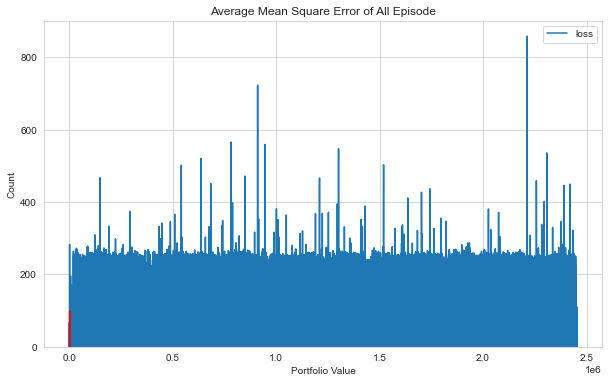

In [13]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

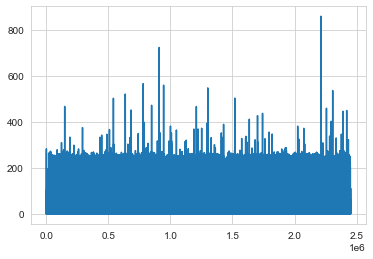

In [14]:
plt.plot(agent.model.losses)

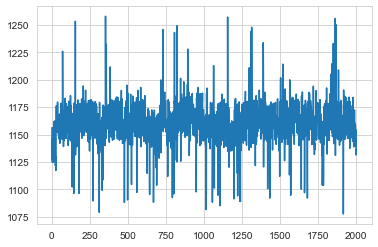

In [15]:
plt.plot(portfolio_value)

episode end value: 1282.79, duration: 0:00:00.101022
Sell: 409 times, Buy: 345 times


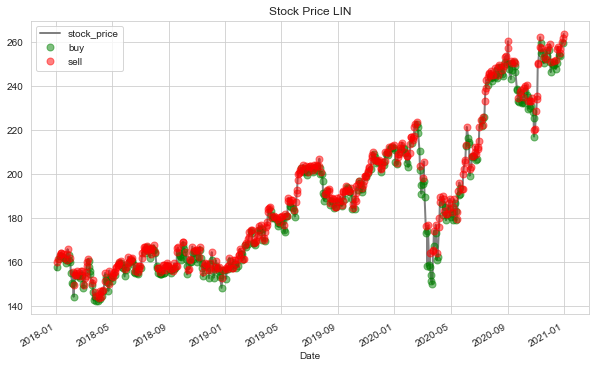

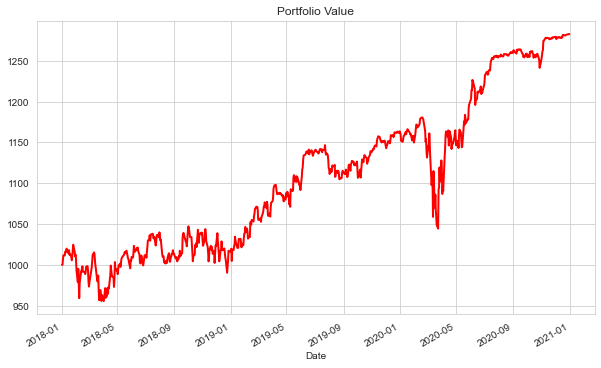

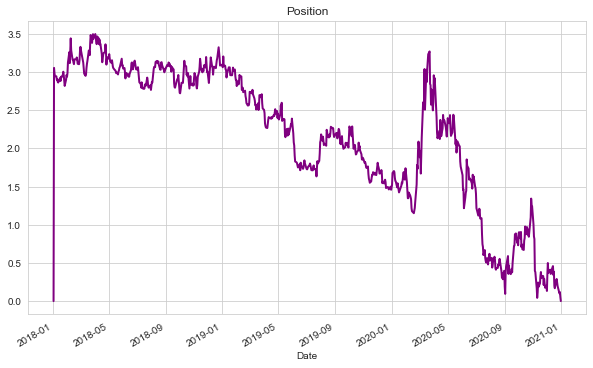

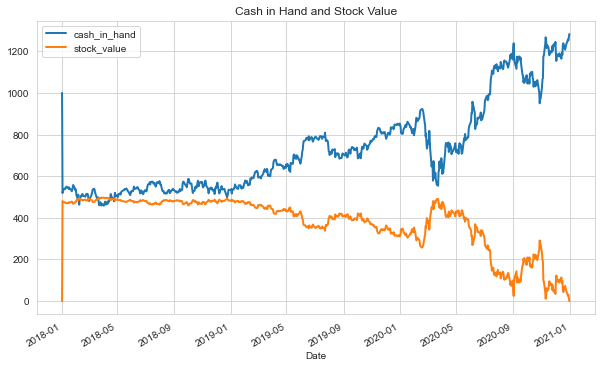

In [16]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [17]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: LIN
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 8.66 %
Volatility: 0.1131
shape ratio: 0.6682
Maximun drawdown: -11.55 %
Calmar ratio: 0.7496
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 19.05 %
Volatility (benchmark): 0.2887
shape ratio: 0.6215
Maximun drawdown: -32.90 %
Calmar ratio (benchmark): 0.5789


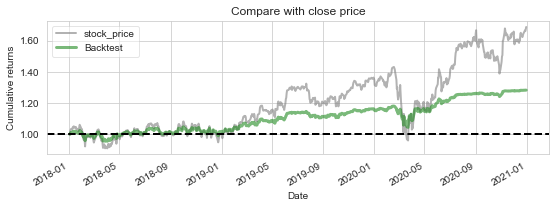

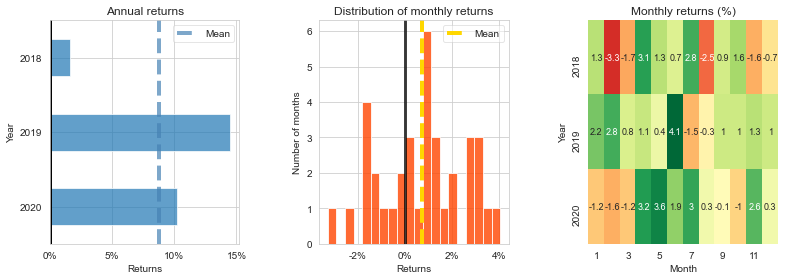

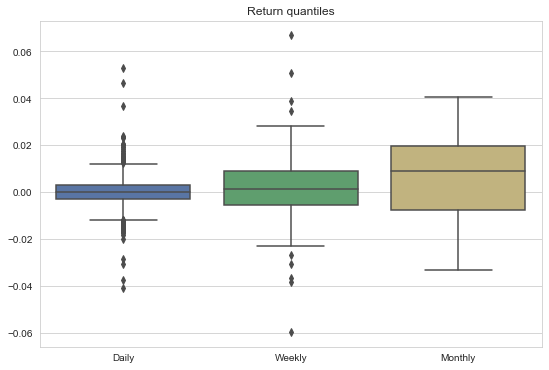

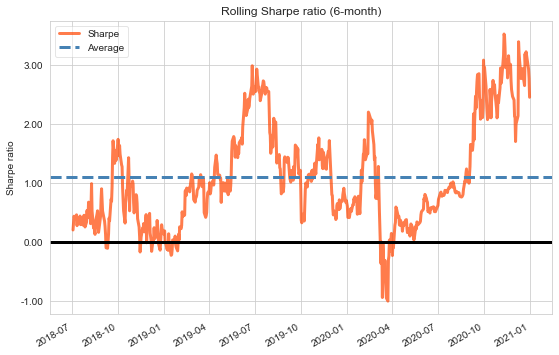

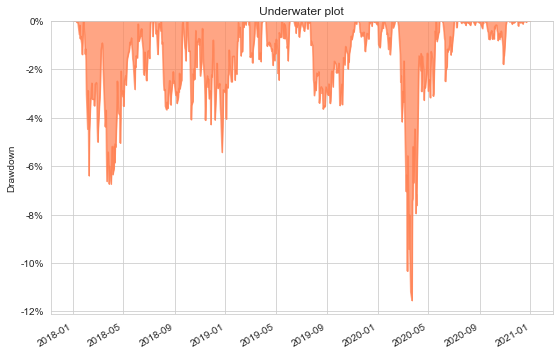

In [18]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')